### NORMALIZED TAG RATIO GRAPH

In [417]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [418]:
closeData=pd.read_csv("tagCount4Reasons.csv") #4 reasons for closure(excluding duplicate)
openData=pd.read_csv("tagWithOpenCount.csv")

In [419]:
closeData.shape

(20666, 3)

In [420]:
openData.shape

(54126, 3)

In [421]:
tagData=closeData.merge(openData,how="outer")
print(tagData.head())
print(tagData.shape)

   TagId  countOfQuesClosed     TagName  countOfQuesStillOpen
0      1             4768.0        .net              263882.0
1      2            18998.0        html              747022.0
2      3            27528.0  javascript             1645699.0
3      4            12759.0         css              535258.0
4      5            29303.0         php             1160245.0
(54158, 4)


In [422]:
tagData[tagData['TagId']==26]

,TagId,countOfQuesClosed,TagName,countOfQuesStillOpen
20666,26,NaN,j#,57.0


In [423]:
tagData.replace(np.nan,0,inplace=True)

In [424]:
tagData[tagData['TagId']==26]

,TagId,countOfQuesClosed,TagName,countOfQuesStillOpen
20666,26,0.0,j#,57.0


In [425]:
tagData['closeCountNorm']=tagData['countOfQuesClosed']
#/np.sum(tagData['countOfQuesClosed'])
tagData['openCountNorm']=tagData['countOfQuesStillOpen']
#/np.sum(tagData['countOfQuesStillOpen'])
tagData['closeOpenRatio']=tagData['closeCountNorm']/(tagData['openCountNorm']+1)

In [426]:
tagData.head()

,TagId,countOfQuesClosed,TagName,countOfQuesStillOpen,closeCountNorm,openCountNorm,closeOpenRatio
0,1,4768.0,.net,263882.0,4768.0,263882.0,0.018069
1,2,18998.0,html,747022.0,18998.0,747022.0,0.025432
2,3,27528.0,javascript,1645699.0,27528.0,1645699.0,0.016727
3,4,12759.0,css,535258.0,12759.0,535258.0,0.023837
4,5,29303.0,php,1160245.0,29303.0,1160245.0,0.025256


In [427]:
tagData.sort_values(by=['closeOpenRatio'],ascending=False,inplace=True)
print(tagData.iloc[0:10])

        TagId  countOfQuesClosed        TagName  countOfQuesStillOpen  \
1645     3871              274.0            gpl                   0.0   
1730     4089              102.0           lgpl                   0.0   
18358  111007               42.0  rosetta-stone                   0.0   
3743     9968               20.0        godaddy                   0.0   
13885   73861                9.0       tool-rec                   0.0   
232       474               30.0       freeware                   3.0   
4247    11638                5.0     beautifier                   0.0   
245       508              749.0          agile                 225.0   
17227  102637                3.0       unicoins                   0.0   
710      1504              475.0          scrum                 201.0   

       closeCountNorm  openCountNorm  closeOpenRatio  
1645            274.0            0.0      274.000000  
1730            102.0            0.0      102.000000  
18358            42.0          

In [428]:
top=25
labels=tagData['TagName'].iloc[0:top]
#print(labels)
indices=[i for i in range(1,top+1)]
#print(indices)
ratios=np.array(tagData['closeOpenRatio'].iloc[0:top] )
#from sklearn.preprocessing import scale
#ratios=scale(ratios)
print(ratios)
print(type(ratios))
print(ratios.shape)

[274.         102.          42.          20.           9.
   7.5          5.           3.31415929   3.           2.35148515
   2.           2.           2.           2.           2.
   2.           2.           1.98947368   1.95238095   1.89534884
   1.5          1.34782609   1.33333333   1.29166667   1.28571429]
<class 'numpy.ndarray'>
(25,)


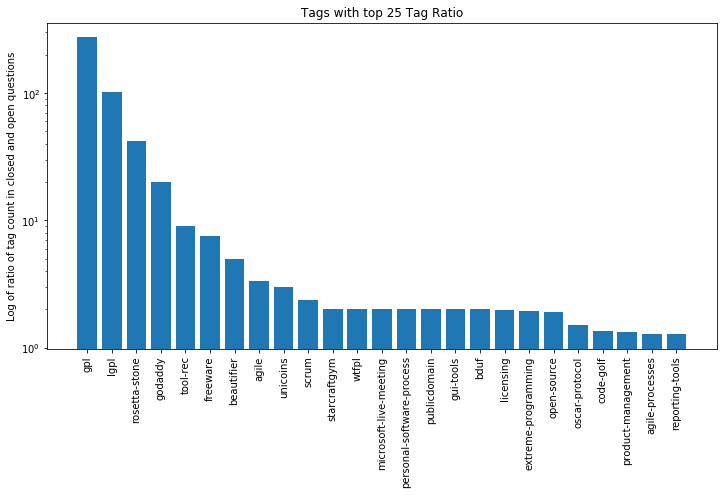

In [429]:
plt.figure(figsize=(12, 6))
plt.bar(indices,ratios,align='center')
plt.ylabel("Log of ratio of tag count in closed and open questions")
plt.xticks(indices, labels)
plt.xticks(rotation=90)
plt.title("Tags with top "+str(top)+" Tag Ratio")
plt.yscale('log')
plt.show()
#plt.savefig('D:\SAJAL\\foo.png')